In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from scipy import stats
import trimesh as tm
import meshplot as mp
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Circle
from scipy.stats import pearsonr
from matplotlib.patches import Rectangle
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import schemdraw as schemdraw
import schemdraw.elements as elm
from sympy import symbols, pi, Function, sqrt

## Part 1 - Highly heterogeneous spine neck geometry with exceedingly constricted neck diameter revealed by serial EM reconstruction.

In [2]:
target_directory = '/home/netanelofer/Dropbox/Spine'
current_directory = os.getcwd()
if current_directory != target_directory:
    os.chdir(target_directory)

# fileName, np.round(1_500_000*Res/1_000_000, 2), np.round(1_500_000*Res_Rev/1_000_000, 2), np.round(np.sum(LL), 3), np.round(np.mean(AA), 4), np.round(AAV, 4), normalized_mad1, normalized_maean2, np.round(np.min(AA), 4)))
column_names = ['Resistance', 'Reverse_Resistance', 'neck_length', 'average_cs_area', 'weighted_average_cs_area', 'nMAD', 'nMean', 'min_cs_area', 'head_area']
df = pd.read_csv('Kasthuri_spine_neck_resistance_parallel12.txt', delim_whitespace=True, header=None, names=column_names)

print(len(df))

df2 = df[(df['neck_length'] != 0) & (~df['neck_length'].isna())]
df2 = df2[(df2['average_cs_area'] != 0) & (~df2['average_cs_area'].isna())]
df2['Resistance_by_average'] = 1.5*df2['neck_length']/ df['weighted_average_cs_area']
print(len(df2))

2074
2074


In [3]:
Min_Neck_radius = np.sqrt(df2['min_cs_area']/np.pi)
Neck_radius_av = np.sqrt(df2['weighted_average_cs_area']/np.pi)
R_necks = df2['Resistance']
R_necks_av = 1.5*df2['neck_length']/df2['weighted_average_cs_area']

In [4]:
Neck_radius_av2 = np.array(Neck_radius_av*2000)
Neck_radius2 = np.array(Min_Neck_radius*2000)

# Step 2: Get the sorted indices based on Neck_radius_av
sorted_indices = np.argsort(Neck_radius_av2)

# Step 3: Sort both arrays using the same indices
Neck_radius_av_sorted = Neck_radius_av2[sorted_indices]
Neck_radius_sorted = Neck_radius2[sorted_indices]

In [5]:
AA = [0.01017675, 0.01013481, 0.0101801 , 0.01148276, 0.01135292,
       0.00918863, 0.0088686 , 0.00834031, 0.00799977, 0.0075971 ,
       0.00748129, 0.00786696, 0.00856741, 0.0097712 , 0.01059726,
       0.01088109, 0.01096759, 0.01108515, 0.01131493, 0.01154449,
       0.01176914, 0.01178965, 0.01189928, 0.0117737 , 0.01184859,
       0.01236749, 0.01255017, 0.01250221, 0.0108952 , 0.00979517,
       0.00964712, 0.00977045, 0.00962412, 0.00917132, 0.00847709,
       0.00765745, 0.0066771 , 0.00640118, 0.00627942, 0.00617979,
       0.0060025 , 0.00571573, 0.00520283, 0.00506567, 0.00521892,
       0.0053075 , 0.0051999 , 0.00494204, 0.00451442, 0.00409267,
       0.00389824, 0.00382005, 0.00379184, 0.00383831, 0.0038709 ,
       0.00382894, 0.00380445, 0.00395451, 0.00410692, 0.00418455,
       0.00432674, 0.00460284, 0.00465744, 0.00440967, 0.00435518,
       0.00351716, 0.00305315, 0.00257235, 0.00230982, 0.00206104,
       0.00217765, 0.00249553, 0.0031197 , 0.00327244, 0.00325708,
       0.00299411, 0.00255645, 0.00210698, 0.00167798, 0.00058882,
       0.00109592, 0.00174421, 0.00270677, 0.00323577, 0.00347389,
       0.00315428, 0.00280224, 0.00245504, 0.00195767, 0.00247592,
       0.00294509, 0.00303642, 0.0027797 , 0.00281692, 0.00253362,
       0.00210715, 0.00222702, 0.00234866, 0.00196334, 0.00186427,
       0.00191177, 0.0023175 , 0.00288291, 0.0040488 , 0.00525382,
       0.0055751 , 0.00601356, 0.00670406, 0.00739477, 0.00786232,
       0.00938862, 0.01073736, 0.01197647, 0.01327645, 0.0149472 ,
       0.01785482, 0.01946103, 0.02217307, 0.00988277, 0.00961909,
       0.0093569 , 0.00974128, 0.01069324, 0.01244058, 0.01455606,
       0.01519646, 0.01580789, 0.01670431, 0.01705664, 0.01734237,
       0.01823617, 0.02049674, 0.02308859, 0.02550744, 0.02683204,
       0.02750393, 0.02791524, 0.02816548, 0.02866718, 0.02840587,
       0.02804035, 0.02785115, 0.0276904 , 0.0275494 , 0.0279208 ,
       0.02882263, 0.0300327 , 0.02996756, 0.02982274, 0.02925686,
       0.02870717, 0.02850654, 0.02866423, 0.02807921, 0.02725448,
       0.02673326, 0.02627549, 0.02553165, 0.02523581, 0.02353715,
       0.02318252, 0.02406173, 0.0230679 , 0.02152941, 0.01973239,
       0.01855601, 0.01673629, 0.01574052, 0.01508586, 0.01460164,
       0.01453616, 0.0148527 , 0.01496255, 0.01502429, 0.01498312,
       0.01490972, 0.01518742, 0.0154118 , 0.01636072, 0.01702812,
       0.01720998, 0.01718903, 0.01668564, 0.01563362, 0.01512981,
       0.01485892, 0.01519865, 0.01501708, 0.01427652, 0.01504094,
       0.01616676, 0.01681093, 0.01747666, 0.01816606, 0.01837609,
       0.01435716, 0.0127631 , 0.01088392, 0.00919765, 0.00844556,
       0.00749583, 0.00592769]
print(len(AA) , np.sum(AA))

AA_blue = [0.0043177 , 0.00456193, 0.00543524, 0.00642097, 0.00760527,
       0.00876708, 0.01008747, 0.01039305, 0.0112365 , 0.01166237,
       0.01237183, 0.01425811, 0.01603668, 0.01779612, 0.0186339 ,
       0.01866201, 0.01778577, 0.01700459, 0.01602028, 0.01533755,
       0.01500763, 0.01487419, 0.01498108, 0.01481267, 0.01435343,
       0.01422905, 0.01491396, 0.01555604, 0.01666231, 0.01760316,
       0.01784036, 0.0176192 , 0.01681309, 0.01565059, 0.01589935,
       0.0165777 , 0.01691449, 0.01836012, 0.01919871, 0.01932127,
       0.01946007, 0.01905007, 0.01737222, 0.01557787, 0.01530012,
       0.01678808, 0.0187286 , 0.02032312, 0.02257187, 0.02478705,
       0.02613013, 0.02706797, 0.0285509 , 0.03117021, 0.03351548,
       0.03581771, 0.0383073 , 0.04112042, 0.04213853, 0.04449993,
       0.04517037, 0.04691126, 0.04774915, 0.04853072, 0.04987666,
       0.05042072, 0.05093082, 0.05125847, 0.05209779, 0.05135381,
       0.05029606, 0.04849205, 0.04645145, 0.04523147, 0.04374615,
       0.04196885, 0.03992313, 0.03759157, 0.03622067, 0.03413159,
       0.03258999, 0.03064667, 0.02916047, 0.02642403, 0.02639018,
       0.02489179, 0.02315268, 0.02167504, 0.02128577, 0.01972556,
       0.01839121, 0.01699424, 0.01640077, 0.01600269, 0.01577171,
       0.01557346, 0.01541222, 0.01524805, 0.01521406, 0.01518214,
       0.0150674 , 0.01498892, 0.01477445, 0.01454584, 0.01447531,
       0.01451427, 0.01460801, 0.01472514, 0.01482617, 0.01508124,
       0.01538886, 0.01552248, 0.01577684, 0.01650579, 0.01718778,
       0.01783411, 0.01797341, 0.01756626, 0.0169344 , 0.01644745,
       0.01611646, 0.01567851, 0.01532726, 0.01514459, 0.0151276 ,
       0.01500645, 0.0146897 , 0.01431077, 0.01388837, 0.01377488,
       0.01416562, 0.01438018, 0.01643827, 0.01812221, 0.01956305,
       0.02033296, 0.02115403, 0.02291058, 0.02411583, 0.02630124,
       0.02890358, 0.03348716]

print(len(AA_blue) , np.sum(AA_blue))

VV = [np.sqrt(AA[i]/np.pi) for i in range(len(AA))]
len(VV)

202 2.38900563
142 3.16802939


202

In [6]:
radii = [0.1019792599155478, 0.09370595280074157, 0.08954221505146848, 0.08132215972907052, 0.06932548689177429, 0.06488642935168022, 0.06021158577293969, 0.0583372690107233, 0.05668174895389387, 0.054364346965248576, 0.05017308834575913, 0.04876586848964205, 0.04613979313639596, 0.04374078856561255, 0.04210091655413309, 0.04107108367116805, 0.035704948803468646, 0.030502088428387426, 0.027074561560684843, 0.02473225171721177, 0.024067325961676714, 0.02509306955734433, 0.027295174117898172, 0.02654985555659293, 0.02600441958347983, 0.02840588430671221, 0.029853617979398263, 0.029882670241839656, 0.031302413401651775, 0.030533406004352847, 0.027623729118925404, 0.024833494299716354, 0.027958040346563046, 0.02987981869092592, 0.03181103363578492, 0.03323883625415738, 0.031984415596937585, 0.029322725228622906, 0.023579374510180152, 0.018605481040251053, 0.013607583814441729, 0.021715260266129598, 0.02529235165339501, 0.02847292200036158, 0.030866376342440438, 0.03217434685811193, 0.03243777192483209, 0.03150100445847056, 0.02809029695155457, 0.026341787612328152, 0.025608126520347843, 0.02713926239490616, 0.028546015023773724, 0.03168120184033691, 0.03320030369256851, 0.037166687103652125, 0.038032963446083, 0.03813546570618423, 0.03778351085740389, 0.03704154109604009, 0.03635152937819547, 0.03550312634947185, 0.03484793890734471, 0.034942085698766306, 0.035085831611873085, 0.035083175776122515, 0.0349416573252683, 0.034766585598672545, 0.03477248265147726, 0.0348078376332461, 0.03499108671106111, 0.03602180099957103, 0.03724802149414477, 0.03851747078016858, 0.03968592557665209, 0.04092414936459078, 0.04030270717529714, 0.040790312911520014, 0.04263010671484722, 0.043846260801526975, 0.04474134404976752, 0.0450705717591684, 0.04655641475309945, 0.04952273835045648, 0.05178761140846673, 0.05407690001696659, 0.05520431590499913, 0.055758474968775035, 0.05545996281173337, 0.05561777989503107, 0.05869606090543021, 0.06258907850690194, 0.06321243709478838, 0.06279120325160117, 0.06148334160675125, 0.061244203634536774, 0.06124632865509541, 0.06154409290945197, 0.06158409398482555, 0.06111658833853274, 0.060660304302167435, 0.06000301475668974, 0.05944736261469099, 0.05911070576649014, 0.05857666117584638, 0.05794959663871855, 0.05591069223875296, 0.053345958154109106, 0.04951928547119921, 0.04952845149134532, 0.05030059681624618, 0.0510433202900742, 0.05255445834965156, 0.05439363409361609, 0.06149660572584638, 0.06288347446990412, 0.059881829124439546, 0.05714524480753175, 0.05561264868322134, 0.05466432208491081, 0.05449647252424658, 0.055514565405428595, 0.05798340226074222, 0.06213155600909325, 0.06582101618109105, 0.06862735866253523, 0.07267911452895186, 0.07378361154347782, 0.07469190969039478, 0.07623140277698495, 0.07865354353722202, 0.08313411906010966, 0.08750768150099088, 0.09058565512657996, 0.09301030741984179, 0.09388777875453927, 0.0941828267421951, 0.09426246579636854, 0.09459136802679044, 0.09530209062420407, 0.09561057268060749, 0.09497222642585194, 0.09447402240201323, 0.09416812992057293, 0.0939577841499005, 0.09357262746657152, 0.09376988802411806, 0.09468731246583792, 0.0961684912835615, 0.09645483496686845, 0.0980082052750693, 0.09798885594436063, 0.09732346357058617, 0.09652346940039412, 0.0955501206922114, 0.09525320474893485, 0.09535098613585986, 0.09548539174272652, 0.09467228196945678, 0.09308338639627697, 0.09182612863718012, 0.09008711814159785, 0.09003101386066632, 0.08725092390930998, 0.08598644091871295, 0.08630287160818154, 0.08746445591418113, 0.0853844622796559, 0.08154524823273862, 0.07879703496187335, 0.07154768030522127, 0.06906679359760266, 0.06781911835896764, 0.06825789121274917, 0.0690099068521617, 0.0691382880562038, 0.06907381781643308, 0.06891685746818128, 0.06945492815929555, 0.07015828796172126, 0.07224088634020455, 0.07345253707226257, 0.07389261646161384, 0.07414869788338925, 0.07322951322507285, 0.07270587829363023, 0.07016844549619836, 0.06903444683815431, 0.06898710310492574, 0.0691722265055907, 0.069572631481988, 0.06924178618299488, 0.06776121620117846, 0.06822269606620651, 0.07129522112252269, 0.07406618913675077, 0.07469590606817018, 0.07592425739855867, 0.0759830667501583, 0.07525838646268031, 0.07391607616919538, 0.06806378518196696, 0.06304691734434655, 0.0607381891632992, 0.05702084567403949, 0.05400827099044254, 0.05152058721942457, 0.04837897460976514, 0.04629787904465183, 0.042555102953195534]
L_slice = [0.019489232924873874, 0.008002262180161842, 0.01589161728711148, 0.029191390854151646, 0.014358314664330955, 0.022669428753281415, 0.01547874671929525, 0.01080381876930354, 0.009115322265285556, 0.013928836993805031, 0.008011760106245852, 0.01465172344810873, 0.016617776626256, 0.011264785839061832, 0.011455431026375681, 0.0193607257095378, 0.018105739421520876, 0.015418073809657887, 0.0245831425981313, 0.016410085313609237, 0.020053077070609413, 0.01534057039357279, 0.013695762118261639, 0.015852933482479268, 0.014289835548383709, 0.011675482859396399, 0.015431066068164932, 0.01987793248806279, 0.0211731598964387, 0.010576454982648807, 0.021137185243072763, 0.016682832493311803, 0.018288797117363698, 0.017546287356583673, 0.013966305882378172, 0.016119416862898438, 0.013253988079068179, 0.018377948742992964, 0.01443549444944208, 0.0246475495739456, 0.01551338132065056, 0.01554526937688905, 0.024754755098771005, 0.016948961620109993, 0.015557647637092173, 0.013625039449487671, 0.016304879637702965, 0.016734793097018273, 0.011459995636997096, 0.017226131312629085, 0.013930735802532315, 0.009677422177418763, 0.01673399832676296, 0.00992635381194526, 0.022217562872650937, 0.02054449074569271, 0.010432276836822128, 0.017570318722205554, 0.013758942546574983, 0.016590012055455447, 0.02576010093147926, 0.02257019494820457, 0.014534490015133543, 0.010111829705841853, 0.010659057181569414, 0.008106694764208609, 0.019832914561405963, 0.012681285423805462, 0.005833300952288011, 0.0073708479837796305, 0.016112125868426946, 0.011902138463319842, 0.011109464433535802, 0.0120233148507404, 0.023312593163349975, 0.02855517641339496, 0.018870039745581612, 0.015889018220142256, 0.013073564930807977, 0.019134265076036647, 0.00641283868500904, 0.018215180482223096, 0.028874719046254802, 0.01632762689431682, 0.014896959421301887, 0.008960630558176067, 0.018523212464360346, 0.014144076498664483, 0.019467308493987583, 0.02411471335097615, 0.021001949909472545, 0.015883305701271774, 0.016821798358081827, 0.020763248782401447, 0.007146929410593924, 0.010162529212751532, 0.012976320742033896, 0.009222331592388167, 0.009186294138552436, 0.012761085377032693, 0.013929486709856862, 0.012223690113871056, 0.015422642445446945, 0.013525572076621223, 0.00930291352212012, 0.017196203069281355, 0.013532745471633962, 0.021431614498214832, 0.023621320877546353, 0.010622697397553591, 0.008465370635710125, 0.01677082585921207, 0.01712497007296847, 0.03527643122539305, 0.015116484379643589, 0.028128750416610643, 0.02406235649308064, 0.023785016291772192, 0.013554663404159593, 0.010067993841874604, 0.010470673330782897, 0.01660918721671844, 0.01649620865532444, 0.015433632106536858, 0.014978741602686722, 0.03157521496363596, 0.022122917981138336, 0.013545069213553638, 0.012603547119758831, 0.011849329094930413, 0.016042387602850306, 0.013964086078220675, 0.011505598637185109, 0.01492944406199047, 0.01135639907717006, 0.013124854284909674, 0.010066091595046886, 0.012297520075201358, 0.012277039545434002, 0.012125699979789977, 0.01462159362039753, 0.013760744892627647, 0.014962783831897326, 0.015428995430679219, 0.01298266921707517, 0.01411219330933315, 0.012660450228963002, 0.010569323535589386, 0.00882996036231443, 0.014253427657933498, 0.007120807538474018, 0.021941096143999292, 0.015512955875653324, 0.01398199198969618, 0.010507278429737475, 0.01012701831735164, 0.014554923565582772, 0.014373607758666182, 0.01706204559834576, 0.015677362660860766, 0.011837115358054321, 0.004750968322350914, 0.013646853117112799, 0.015651958343927352, 0.012442668524073518, 0.0261339702303329, 0.01717484788870513, 0.02189048423402519, 0.011908240844052374, 0.03423844914711769, 0.014343291114663863, 0.016604658984757954, 0.014766075985172605, 0.014655920305462995, 0.00827249055605701, 0.010240297847225504, 0.01709332910816746, 0.018685954618374013, 0.013090198623399447, 0.024690552849218245, 0.017734491816791736, 0.014411596025425728, 0.012470276660921157, 0.016678189350166503, 0.01347050852789432, 0.018247125801068707, 0.016124121681503064, 0.011050095022218378, 0.007136147420003881, 0.009944511048816712, 0.017440991944262865, 0.02070385954357139, 0.01749180665340458, 0.023691325416697457, 0.009528683014986113, 0.007052269138370737, 0.018980413588749478, 0.01915986951938578, 0.015624407188756906, 0.013195495443522713, 0.011233049452397954, 0.014601763592116561, 0.010940763227488074, 0.012439272486764274, 0.013565787850328428, 0.012051796546574251, 0.014148533492909546, 0.009418731337069261, 0.014922888460349833, 0.029883994043637806]

radii = radii[::-1]
L_slice = L_slice[::-1]

print(len(radii))

### BLUE spine
radii_blue = [0.08045289556049474, 0.0781680439006387, 0.07560954210303221, 0.07255139041517968, 0.07078975291995886, 0.0675279622332459, 0.06630462437075622, 0.0664068049359676, 0.06670660888669201, 0.06754037641682088, 0.0681818335153756, 0.06859798373601127, 0.0691186987309421, 0.06939478791500238, 0.06948902011093097, 0.06996010764096933, 0.07088149367624885, 0.07223312851446409, 0.07471990583371765, 0.07566764703173498, 0.07520918886115373, 0.07227442110608438, 0.07054205046723573, 0.0697821282350037, 0.06992643169216793, 0.06950481808412559, 0.06892068047470193, 0.06839344173549639, 0.06819808765194724, 0.06780510297177224, 0.06883610623202156, 0.0691690528579151, 0.06934497866834646, 0.06949729621673419, 0.0697890572515712, 0.07010146902212376, 0.07059399248631885, 0.07149705412681266, 0.07216541497158527, 0.07369059454706292, 0.0752090700141994, 0.07740434845992894, 0.07995335810587205, 0.0822709166610033, 0.08387480291013985, 0.08469778266834835, 0.08563887388911003, 0.08681834049605808, 0.08888314652197057, 0.09066408582218222, 0.09163008417506067, 0.09351845127664116, 0.09603288999047287, 0.09815146610004565, 0.1004599084292386, 0.10583413889516269, 0.11181041455753907, 0.1153297991692541, 0.11780890955251928, 0.12018981398931543, 0.12207385567403163, 0.12309228044830553, 0.12418672667617588, 0.12750851437639704, 0.12906131857071845, 0.12870004649486927, 0.12824211456858176, 0.12773378328140084, 0.1277493665786991, 0.1278255383240082, 0.1266235142884946, 0.12430954455972114, 0.12235613120158857, 0.11926217898946054, 0.11710314990625371, 0.11580403766180981, 0.11318991088475484, 0.11144580653906003, 0.10926891120761045, 0.10740822639055303, 0.1046544281813205, 0.10223661491777182, 0.09984653903497424, 0.09603309469406676, 0.091905453920048, 0.08844155617019511, 0.08525408683601567, 0.07956686545103786, 0.07620457289992583, 0.07240036489859442, 0.0697532608808281, 0.06979004084888306, 0.07193331748122483, 0.07345870611002667, 0.07455093834358686, 0.07652507169423717, 0.07797273573837722, 0.07859366383166122, 0.07814316030694528, 0.07777633203380373, 0.0767327865739027, 0.07489468232239115, 0.07345979440722251, 0.07241176592554967, 0.0712839927291726, 0.07060526287162196, 0.07054982384074035, 0.07197202223562203, 0.07502611171762162, 0.07536524614905135, 0.07423872849252809, 0.07178437846073277, 0.06919359560160657, 0.06799319052303696, 0.06761535850236358, 0.0679056309055162, 0.0686783783536457, 0.0690286139866906, 0.06886707851677484, 0.06917015906537026, 0.06996567246999495, 0.07206939303287796, 0.07365865538011215, 0.07501804844226449, 0.07658600694676784, 0.07709363804200318, 0.07714282499944276, 0.07615626532658162, 0.07478530842565473, 0.07052064625080565, 0.06583582452335779, 0.06228196571884253, 0.05882450621706657, 0.05801547643629895, 0.05575052629984988, 0.05284526895964712, 0.04782345579959819, 0.04435298079984566, 0.04202368530470432]
L_slice_blue = [0.018730675374902944, 0.013252965705834584, 0.011494568282453106, 0.005951142747404669, 0.01334364642816932, 0.010615714766324866, 0.009455950507483768, 0.004696275119711129, 0.013508815640166275, 0.009674011577415213, 0.005422868244759245, 0.007745792406203737, 0.008204998476538727, 0.009166656969692958, 0.01014712767240025, 0.010847386782077915, 0.010020089819957717, 0.018982499835374263, 0.008585837175257523, 0.017836829875287008, 0.018099906077100148, 0.017881750473601233, 0.015339266605675209, 0.01496639903250058, 0.00878920929321824, 0.008223515063520826, 0.009673954723897475, 0.005995139698120559, 0.01132338288675468, 0.019197716009984697, 0.012761535957710983, 0.012164904438590713, 0.011628473674558886, 0.013094395747800679, 0.010448301297341707, 0.008818713058035116, 0.010687455263068265, 0.005932866086471223, 0.01183121718167337, 0.007982343014429105, 0.009483359109517262, 0.01005267128677691, 0.009314644383978844, 0.010218815978377852, 0.008513900398761442, 0.010727390176553562, 0.008970050167083505, 0.01796944907335767, 0.013713157914935962, 0.006963296633061166, 0.012922403027299452, 0.013969731565070918, 0.009249567557459445, 0.009403589740088229, 0.02230161429135002, 0.025320620055596713, 0.016730391507671496, 0.016036243325667363, 0.016178300281552475, 0.011464004535940282, 0.006593375463297049, 0.005939385490098146, 0.019049026221831588, 0.022838163236123324, 0.016352599181785277, 0.0057581073279321885, 0.005594658166500969, 0.014996646291757232, 0.007547695012385319, 0.00995567175030866, 0.013341135633824263, 0.010282888699192364, 0.0158333508771837, 0.007784144140493805, 0.005414877653282543, 0.010803369844637785, 0.007296636211296678, 0.008243597515644475, 0.007475787583924179, 0.011474798473181943, 0.011386566646711943, 0.009881528221886392, 0.013878688698868161, 0.014597842306314385, 0.012316570139449501, 0.012839540490216897, 0.021274888953885927, 0.013030418258825572, 0.016223877465016433, 0.019469817667357302, 0.014826128962069784, 0.013029343805429966, 0.00770439484969127, 0.005112778109796311, 0.00924060604073058, 0.011041820502070603, 0.008238804524935597, 0.012481229907340621, 0.0053458207975974, 0.00980590128442957, 0.013761773141568831, 0.009681668244677546, 0.007176914378756741, 0.008946373566980241, 0.008836407641122744, 0.006055584199726991, 0.012070397673644548, 0.02570046692183094, 0.005768448664936142, 0.015212011701281152, 0.010485661638637676, 0.009315052334799104, 0.008220158149329481, 0.006251311862324077, 0.008963866353303457, 0.012530339181366526, 0.011339109312463408, 0.00906441945189781, 0.013516900532302421, 0.007757667175121878, 0.015362037625261558, 0.008201420608652924, 0.007858912138459165, 0.010353424554222978, 0.0059964155960029585, 0.007753741032560081, 0.009715950802675838, 0.0069280733252461224, 0.014731826091832684, 0.013092264891910826, 0.012018069728541473, 0.011944559430966412, 0.005893700026304637, 0.00784084816840413, 0.012837464702971674, 0.019375244514583712, 0.015400071428406194, 0.01013793371452116, 0.016065957799020435]

radii_blue = radii_blue[::-1]
L_slice_blue = L_slice_blue[::-1]

print(len(radii_blue))


210
139


In [7]:
img = Image.open('figures/Branch_D7_SM5_04.png') # white
img2_branch = np.array(img)[2400:4200, 0:9300]

spine_2368 = Image.open('figures/Kasthuri_2368_blue_300dpi_June2025.png')

spine_2389 = Image.open('figures/Kasthuri_2389_orange_June2025.png')
img44 = np.array(spine_2389)[60:2960, 980:2100]

spine_2389b = np.ones((3000,3000,4))*255
spine_2389b[:,1900:3000,:] = np.array(spine_2389)[:,1000:2100,:]
spine_2389b = np.clip(spine_2389b, 0, 255).astype(np.uint8)

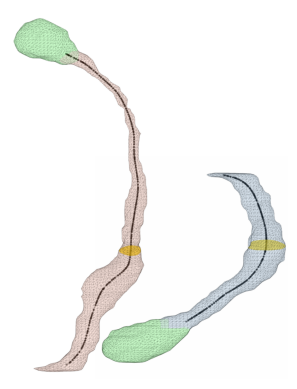

In [8]:
img1 = np.array(spine_2368)
img2 = np.array(spine_2389b)

# Blend the images
blended_img = img1 * 1 + img2 * 1  # Adjust the blending ratio as needed
blended_img = np.clip(blended_img, 0, 255).astype(np.uint8)  # Ensure pixel values are within valid range

blended_img2 = blended_img[:,750:,:]

blended_img3 = np.ones((3000,3000,4))*255
blended_img3 = np.clip(blended_img3, 0, 255).astype(np.uint8)  # Ensure pixel values are within valid range
blended_img3[:,:1130,:] = img2[:,1870:,:]
SS = 105
blended_img3[1200:,800-SS:2350-SS,:] = blended_img3[1200:,800-SS:2350-SS,:]  + img1[550:2350,750:2300,:]

blended_img4 = blended_img3[:,:2250,:]
plt.imshow(blended_img4)
plt.axis('off');
#plt.savefig('figures/Kasthuri_2389_orange_2368_blue.png', dpi=300)

In [9]:
df3 = pd.DataFrame({'leng': df2['neck_length'], 'MAD': df2['nMAD']})
df3 = df3.sort_values(by='leng')
MAX_LENG = 2055
xxx = df3['leng'][:MAX_LENG]; yyy = df3['MAD'][:MAX_LENG]

## Origin 0,0
slope_org = np.sum(xxx * yyy) / np.sum(xxx ** 2)
y_fit1 = slope_org * xxx
numerator = np.sum(xxx * yyy)
denominator = np.sqrt(np.sum(xxx ** 2) * np.sum(yyy ** 2))
r_value_org_lng_vs_MAD = numerator / denominator
# Calculate degrees of freedom
n = len(xxx)
df = n - 1  # Degrees of freedom for regression through the origin
t_statistic = r_value_org_lng_vs_MAD * np.sqrt(df / (1 - r_value_org_lng_vs_MAD ** 2))
# Calculate the two-tailed p-value
p_value_org_lng_vs_MAD = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df))

In [10]:
EM_thick = mpimg.imread('figures/EM_thick5.tif')
EM_thin = mpimg.imread('figures/EM_thin5.tif')

Orange spine belongs to bin index: 12, with x position: 0.5738637264440021
Blue spine belongs to bin index: 3, with x position: 0.14647489051673976
R= 0.8501244048255868


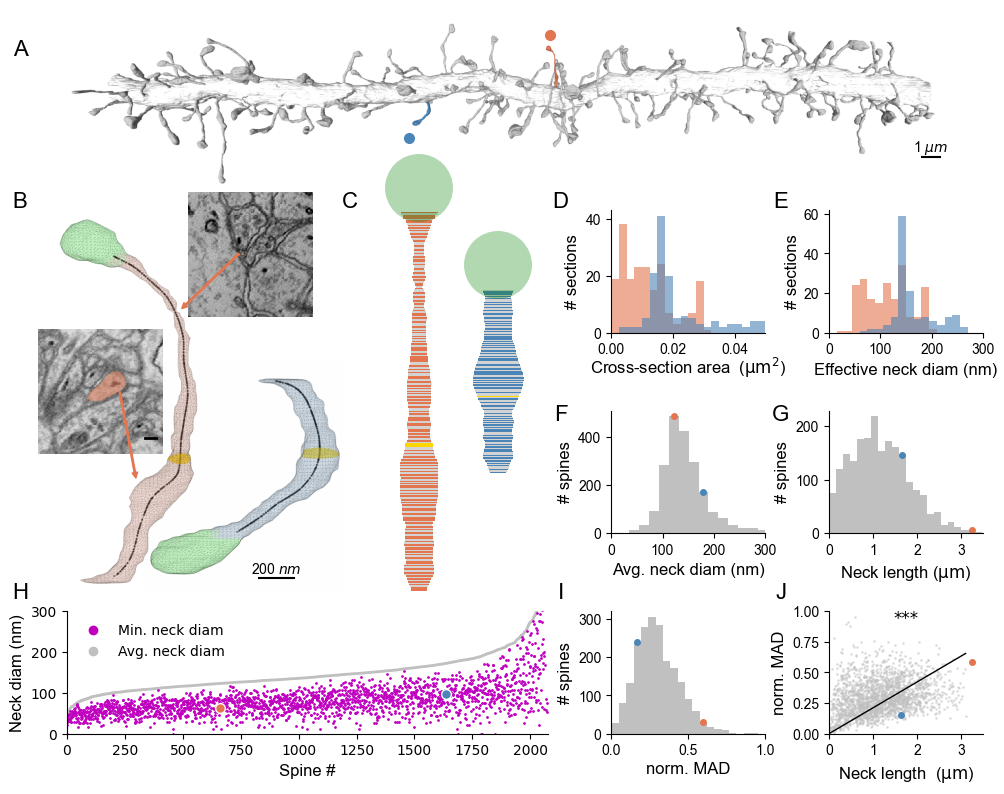

In [11]:
fig = plt.figure(figsize=(10.01 , 7.6)) # w, h 10.01 , 6.16
gs = gridspec.GridSpec(6, 18, height_ratios=[1.45, 1, 0.3, 1, 0.3, 1])
ax1 = fig.add_subplot(gs[0, 1:19])
ax4 = fig.add_subplot(gs[1:5, 0:7]) # 14:19
ax3 = fig.add_subplot(gs[3, 11:14])
ax5 = fig.add_subplot(gs[3, 15:18])
ax55 = fig.add_subplot(gs[1, 11:14])
ax9 = fig.add_subplot(gs[1, 15:18])
ax88 = fig.add_subplot(gs[5, 11:14])
ax99 = fig.add_subplot(gs[5, 15:18])
ax66 = fig.add_subplot(gs[5,1:10])

ax22 = fig.add_subplot(gs[1:5, 7:10])

ax1.imshow(img2_branch)
ax1.plot([9300-184.45, 9300] , [1500, 1500] , 'k') # scale for the neuron
ax1.text(9300-(184.45/2), 1400, '1 $\mu m$', ha='center', va='center', fontsize=10, family='Arial')
ax1.axis('off');

ax4.imshow(blended_img4)
ax4.plot([1600, 1880] , [2900, 2900] , 'k') # scale for the spine
ax4.text(1600 + (1880-1600)/2, 2830, '200 $nm$', ha='center', va='center', fontsize=10, family='Arial')

## Red arrows:
ax4.annotate('', xy=(970, 800), xytext=(1470, 320), arrowprops=dict(facecolor='#e3754f', edgecolor='#e3754f', shrink=0.05, width=1, headwidth=4, headlength=4), fontsize=12, family='Arial', zorder=10)
ax4.annotate('', xy=(640, 2150), xytext=(500, 1400), arrowprops=dict(facecolor='#e3754f', edgecolor='#e3754f', shrink=0.05, width=1, headwidth=4, headlength=4), fontsize=12, family='Arial', zorder=10)
ax4.axis('off');

## scale bar:
ax4.plot([790-88, 790], [1800, 1800], 'k', linewidth=2, zorder=10) # 100 nm

ax55.hist(AA, bins=20, color='#e3754f', alpha=0.6, range=(0,0.05))
ax55.hist(AA_blue, bins=20, color='#4b85b7', alpha=0.6, range=(0,0.05))
ax55.set_xlabel('Cross-section area  ($\\mathrm{\\mu m^2}$)', fontsize=12, family='Arial', labelpad=-1)
ax55.set_ylabel('# sections', fontsize=12, family='Arial')
ax55.spines['right'].set_visible(False); ax55.spines['top'].set_visible(False)
ax55.set_xlim([0,0.05])
plt.xticks(family='Arial')
plt.yticks(family='Arial')

hist1, bins1 = np.histogram(df2['neck_length'], bins=40)
ax5.bar(bins1[:-1], hist1, width=np.diff(bins1), color='#C0C0C0', align='edge') 
hg_o = 3.245 # orange spine 
hg_b = 1.633 # blue spine 
bin_index_o = np.digitize(hg_o, bins1) - 1
bin_index_b = np.digitize(hg_b, bins1) - 1
bin_x_position_o = bins1[bin_index_o]  # Get the x position based on the bin's edge
bin_x_position_b = bins1[bin_index_b]
bottom_o = hist1[bin_index_o] - 0
bottom_b = hist1[bin_index_b] - 0
ax5.plot(bin_x_position_o + np.diff(bins1)[bin_index_o]/2, bottom_o , '.', color='#e3754f', markersize=8)
ax5.plot(bin_x_position_b + np.diff(bins1)[bin_index_b]/2, bottom_b , '.', color='#4b85b7', markersize=8)
ax5.set_xlabel('Neck length ($\\mathrm{\\mu m}$)', fontsize=12, family='Arial')
ax5.set_ylabel('# spines', fontsize=12, family='Arial')
ax5.set_xticks([0,1,2,3] , [0,1,2,3])
ax5.set_xlim([0,3.5]) 
ax5.spines['right'].set_visible(False); ax5.spines['top'].set_visible(False)
plt.xticks(family='Arial'); plt.yticks(family='Arial')

# diameters for the example spine
Neck_radius = np.array([np.sqrt(AA[i]/np.pi) for i in range(len(AA))])
ax9.hist(Neck_radius*1000*2, bins=20, range=(0,300), alpha=0.6, color='#e3754f', density=False) 
Neck_radius_blue = np.array([np.sqrt(AA_blue[i]/np.pi) for i in range(len(AA_blue))])
ax9.hist(Neck_radius_blue*1000*2, bins=20, range=(0,300), alpha=0.6, color='#4b85b7', density=False) 
ax9.set_xlabel('Effective neck diam (nm)', fontsize=12, family='Arial')
ax9.set_ylabel('# sections', fontsize=12, family='Arial', labelpad=3)

######### 

ax9.set_xticks([0,100,200,300] , [0,100,200,300])
ax9.spines['right'].set_visible(False); ax9.spines['top'].set_visible(False)
ax9.set_xlim([0,300]) 
plt.xticks(family='Arial'); plt.yticks(family='Arial')

Neck_radius = np.sqrt(df2['weighted_average_cs_area']/np.pi)
hist1, bins1 = np.histogram(Neck_radius*1000*2, bins=40)
ax3.bar(bins1[:-1], hist1, width=np.diff(bins1), color='#C0C0C0', align='edge')
hg_o = np.sqrt(0.0119/np.pi)*1000*2 # orange spine 
hg_b = np.sqrt(0.0228/np.pi)*1000*2 # blue spine 
bin_index_o = np.digitize(hg_o, bins1) - 1
bin_index_b = np.digitize(hg_b, bins1) - 1
bin_x_position_o = bins1[bin_index_o]  # Get the x position based on the bin's edge
bin_x_position_b = bins1[bin_index_b]
bottom_o = hist1[bin_index_o] - 0
bottom_b = hist1[bin_index_b] - 0
ax3.plot(bin_x_position_o + np.diff(bins1)[bin_index_o]/2, bottom_o , '.', color='#e3754f', markersize=8)
ax3.plot(bin_x_position_b + np.diff(bins1)[bin_index_b]/2, bottom_b , '.', color='#4b85b7', markersize=8)
ax3.set_xlabel('Avg. neck diam (nm)', fontsize=12, family='Arial')
ax3.set_ylabel('# spines', fontsize=12, family='Arial')
ax3.set_xticks([0,100,200,300] , [0,100,200,300])
ax3.spines['right'].set_visible(False); ax3.spines['top'].set_visible(False)
ax3.set_xlim([0,300]) 

hist1, bins1 = np.histogram(df2['nMAD'], bins=20)
ax88.bar(bins1[:-1], hist1, width=np.diff(bins1), color='#C0C0C0', align='edge') #, edgecolor='black', alpha=0.3
hg_o = 0.582 # orange spine 
hg_b = 0.154 # blue spine 
bin_index_o = np.digitize(hg_o, bins1) - 1
bin_index_b = np.digitize(hg_b, bins1) - 1
bin_x_position_o = bins1[bin_index_o]  # Get the x position based on the bin's edge
bin_x_position_b = bins1[bin_index_b]
bottom_o = hist1[bin_index_o] - 0
bottom_b = hist1[bin_index_b] - 0
print(f"Orange spine belongs to bin index: {bin_index_o}, with x position: {bin_x_position_o}")
print(f"Blue spine belongs to bin index: {bin_index_b}, with x position: {bin_x_position_b}")
ax88.plot(bin_x_position_o + np.diff(bins1)[bin_index_o]/2, bottom_o , '.', color='#e3754f', markersize=8)
ax88.plot(bin_x_position_b + np.diff(bins1)[bin_index_b]/2, bottom_b , '.', color='#4b85b7', markersize=8)
ax88.set_xlabel('norm. MAD', fontsize=12, family='Arial', labelpad=3)
ax88.set_ylabel('# spines', fontsize=12, family='Arial')
ax88.spines['right'].set_visible(False); ax88.spines['top'].set_visible(False)
ax88.set_xlim([0,1])
plt.xticks(family='Arial')
plt.yticks(family='Arial')


# Neck length Vs. irregularity index
ax99.scatter(xxx, yyy, s=1, color='#C0C0C0', alpha=0.4) # 'b'
ax99.plot([np.min(xxx), np.max(xxx)], [np.min(y_fit1), np.max(y_fit1)], 'k', linewidth=1)
## nMAD
hg_o = 0.582 # orange spine 
hg_b = 0.154 # blue spine
## length
hgl_o = 3.245 # orange spine 
hgl_b = 1.633 # blue spine 
ax99.plot(hgl_o, hg_o , '.', color='#e3754f', markersize=8)
ax99.plot(hgl_b, hg_b , '.', color='#4b85b7', markersize=8)
print('R=', r_value_org_lng_vs_MAD)
ast = '***' if p_value_org_lng_vs_MAD < 0.001 else '**' if p_value_org_lng_vs_MAD < 0.01 else '*' if p_value_org_lng_vs_MAD < 0.05 else ''
ax99.annotate(ast, xy=(0.5, 0.94), xycoords='axes fraction', ha='center', va='center', fontsize=12)
ax99.set_xlabel('Neck length  ($\\mathrm{\\mu m}$)', fontsize=12, family='Arial')
ax99.set_ylabel('norm. MAD', fontsize=12, family='Arial')
ax99.set_xticks([0,1,2,3] , [0,1,2,3])
ax99.spines['right'].set_visible(False); ax99.spines['top'].set_visible(False)
ax99.set_xlim([0,3.5]); ax99.set_ylim([0,1])
plt.xticks(family='Arial'); plt.yticks(family='Arial')


# arrows on the dendrie:
ax1.plot(5150, 200 , '.', color='#e3754f', markersize=14)    # orange
ax1.plot(3650, 1300 , '.', color='#4b85b7', markersize=14) # blue


for ax in [ax1, ax5, ax55, ax9,ax88, ax99, ax3, ax4]:
    for tick in ax.get_xticklabels():
        tick.set_fontname('Arial')
    for tick in ax.get_yticklabels():
        tick.set_fontname('Arial')


imagebox = OffsetImage(EM_thin, zoom=0.3)  # Adjust zoom level as needed
ab1 = AnnotationBbox(imagebox, (0.25, 0.71), frameon=False, xycoords='figure fraction')  # Center at (0.5, 0.5)

imagebox = OffsetImage(EM_thick, zoom=0.3)  # Adjust zoom level as needed
ab2 = AnnotationBbox(imagebox, (0.1, 0.53), frameon=False, xycoords='figure fraction')  # Center at (0.5, 0.5)

ax4.add_artist(ab1)
ax4.add_artist(ab2)

#########
ax66.plot(Neck_radius_av_sorted, color='#C0C0C0', linewidth=2)
ax66.plot(Neck_radius_sorted, color='m', marker='.', markersize=2, linestyle='None') # #404040

ax66.plot(-10,-10, color='m', marker='.', ls='None', label='Min. neck diam', markersize=12) # #404040
ax66.plot(-10,-10, color='#C0C0C0', marker='.', ls='None', label='Avg. neck diam', markersize=12)

## the orange and blue spines:
ax66.plot(660, Neck_radius_sorted[660], color='white', marker='.', markersize=14, linestyle='None')
ax66.plot(660, Neck_radius_sorted[660], color='#e3754f', marker='.', markersize=10, linestyle='None')
ax66.plot(1634, Neck_radius_sorted[1634], color='white', marker='.', markersize=14, linestyle='None')
ax66.plot(1634, Neck_radius_sorted[1634], color='#4b85b7', marker='.', markersize=10, linestyle='None')


ax66.set_xlim([0, len(Neck_radius_sorted)]); ax66.set_ylim([0, 300])
ax66.set_xlabel('Spine #', fontsize=12, family='Arial')
ax66.set_ylabel('Neck diam (nm)', fontsize=12, family='Arial')
ax66.spines['right'].set_visible(False); ax66.spines['top'].set_visible(False)
ax66.legend(fontsize=10, frameon=False)


####### Segmented slices
colors1 = ['#e3754f', 'lightgray'] 
TL = 0  # total length
PX = 1  # scaling factor for length
for i in range(len(radii) - 1):
    height = L_slice[i] * PX
    width = radii[i] * 2  # assuming you want full diameter, not radius
    x_center = 0
    y_bottom = TL
    color = colors1[i % len(colors1)]
    rect = Rectangle((x_center - width / 2, y_bottom), width, height, facecolor=color, edgecolor='none', linewidth=0, alpha=1)
    ax22.add_patch(rect)
    TL += height

# GOLD 210 - 126 = 84    xy, width, height --- bottom-left corner
rect = Rectangle((x_center - radii[84], np.sum(L_slice[:84])), radii[84]*2, L_slice[84], facecolor='gold', edgecolor='none', linewidth=0)
ax22.add_patch(rect)

    
colors2= ['#4b85b7', 'lightgray']  # , 'blue', 'deepskyblue']
TL = 0+1  # total length
for i in range(len(radii_blue) - 1):
    height = L_slice_blue[i] * PX
    width = radii_blue[i] * 2  # diameter, not radius
    x_center = 0.4 # .27
    y_bottom = TL
    color = colors2[i % len(colors2)]
    rect = Rectangle((x_center - width / 2, y_bottom), width, height, facecolor=color, edgecolor='none', linewidth=0, alpha=1.0)
    ax22.add_patch(rect)
    TL += height

# GOLD 139-81=58
rect = Rectangle((x_center - radii_blue[58], 1+np.sum(L_slice_blue[:58])), radii_blue[58]*2, L_slice_blue[58], facecolor='gold', edgecolor='none', linewidth=0)
ax22.add_patch(rect)


ax22.set_xlim([-0.13,0.65])
ax22.set_ylim([0,PX*np.sum(L_slice)])
ax22.axis('off');



# center (XY), radius in PIXELS -- from the bottom-left
circle = Circle((4.19, 6.06), .34, transform=fig.dpi_scale_trans, facecolor='g', edgecolor='none', alpha=0.3)
fig.patches.append(circle)

# for the blue neck:
circle = Circle((4.98, 5.29), .34, transform=fig.dpi_scale_trans, facecolor='g', edgecolor='none', alpha=0.3)
fig.patches.append(circle)

plt.subplots_adjust(left=0.01, right=0.98, top=0.99, bottom=0.04)

plt.annotate('A', xy=(0.02,0.98), xycoords='figure fraction', ha='center', va='center', fontsize=16, family='Arial');
plt.annotate('B', xy=(0.02,0.78), xycoords='figure fraction', ha='center', va='center', fontsize=16, family='Arial');
plt.annotate('C', xy=(0.35,0.78), xycoords='figure fraction', ha='center', va='center', fontsize=16, family='Arial');
plt.annotate('D', xy=(0.56,0.78), xycoords='figure fraction', ha='center', va='center', fontsize=16, family='Arial');
plt.annotate('E', xy=(0.78,0.78), xycoords='figure fraction', ha='center', va='center', fontsize=16, family='Arial'); # , weight='bold'

plt.annotate('F', xy=(0.56,0.5), xycoords='figure fraction', ha='center', va='center', fontsize=16, family='Arial');
plt.annotate('G', xy=(0.78,0.5), xycoords='figure fraction', ha='center', va='center', fontsize=16, family='Arial');
plt.annotate('H', xy=(0.02,0.265), xycoords='figure fraction', ha='center', va='center', fontsize=16, family='Arial');
plt.annotate('I', xy=(0.56,0.265), xycoords='figure fraction', ha='center', va='center', fontsize=16, family='Arial');
plt.annotate('J', xy=(0.78,0.265), xycoords='figure fraction', ha='center', va='center', fontsize=16, family='Arial');

# plt.savefig('figures/figure2_Kasthuri_v6.pdf', bbox_inches='tight', dpi=300)
# plt.savefig('figures/figure2_Kasthuri_v6.png', bbox_inches='tight', dpi=300)

## Part 2 - Irregular spine-neck diameter elevates spine-neck resistance.

In [12]:
def process_spine_image(path):
    img = Image.open(path).convert('RGBA')
    data = np.array(img)
    # Extract RGB channels
    rgb = data[:, :, :3]
    # Create a mask where pixels are white (255, 255, 255)
    white_mask = np.all(rgb == [255, 255, 255], axis=-1)
    # Set alpha channel to 0 where mask is True
    data[white_mask, 3] = 0
    return data

# Now the processing is nearly instant
img_2325_full = process_spine_image('figures/Spine_2325_800ohm_00.png')
img_2368_full = process_spine_image('figures/Spine_2368_01.png')

# Slice the numpy arrays directly
img_2325 = img_2325_full[0:3861, 4750:6060, :]
img_2368 = img_2368_full[1150:5011, 4270:5580, :]

In [13]:
#from scipy.stats import ttest_ind
R_necks_av = 1.5*df2['neck_length']/df2['weighted_average_cs_area']

# Calculate the p-value
pval = stats.ttest_rel(R_necks_av, R_necks) # stats.ttest_ind(R_necks_av, R_necks)
print('pval', pval)

jitter = 0.05
x_R_necks_av = 1 + np.random.normal(0, jitter, size=len(R_necks_av))
x_R_necks = 2 + np.random.normal(0, jitter, size=len(R_necks))


pval TtestResult(statistic=-24.76445383605155, pvalue=8.01331954011729e-119, df=2073)


In [14]:
l_1, l_2, a, b = symbols('l_1 l_2 a b', real=True, positive=True)
R_av, R_s = symbols('R_av R_s', cls=Function)

#
R_s = (l_1/ (pi*a**2)) + (l_2/ (pi*b**2))
R_s

l_2/(pi*b**2) + l_1/(pi*a**2)

In [15]:
R_av = (l_1 + l_2) / (pi *((l_1*a + l_2*b)/(l_1 + l_2))**2)
R_av

(l_1 + l_2)**3/(pi*(a*l_1 + b*l_2)**2)

In [16]:
Rss = []
Ravs = []
L_max = 1000
for l1 in range(0, L_max+100, 100):
    Rss.append( R_s.subs({l_1: l1, l_2: L_max-l1, a: 20, b: 40}) )
    Ravs.append( R_av.subs({l_1: l1, l_2: L_max-l1, a: 20, b: 40}))

Rss  = [(i-np.min(Rss)) / (np.max(Rss)-np.min(Rss)) for i in Rss]
Ravs  = [(i-np.min(Ravs)) / (np.max(Ravs)-np.min(Ravs)) for i in Ravs]


# For higher resolution:
Rss_100 = []
Ravs_100 = []
for l1 in range(0, L_max+10, 10):
    Rss_100.append( R_s.subs({l_1: l1, l_2: L_max-l1, a: 20, b: 40}) )
    Ravs_100.append( R_av.subs({l_1: l1, l_2: L_max-l1, a: 20, b: 40}))

Rss_100  = [(i-np.min(Rss_100)) / (np.max(Rss_100)-np.min(Rss_100)) for i in Rss_100]
Ravs_100  = [(i-np.min(Ravs_100)) / (np.max(Ravs_100)-np.min(Ravs_100)) for i in Ravs_100]

In [17]:
L_max = 1000
Rss2 = []
Ravs2 = []
for l1 in range(0, L_max+100, 100):
    Rss2.append( R_s.subs({l_1: l1, l_2: L_max-l1, a: 20, b: 100}) )
    Ravs2.append( R_av.subs({l_1: l1, l_2: L_max-l1, a: 20, b: 100}))

Rss2  = [(i-np.min(Rss2)) / (np.max(Rss2)-np.min(Rss2)) for i in Rss2]
Ravs2 = [(i-np.min(Ravs2)) / (np.max(Ravs2)-np.min(Ravs2)) for i in Ravs2]


Rss2_100 = []
Ravs2_100 = []
for l1 in range(0, L_max+10, 10):
    Rss2_100.append( R_s.subs({l_1: l1, l_2: L_max-l1, a: 20, b: 100}) )
    Ravs2_100.append( R_av.subs({l_1: l1, l_2: L_max-l1, a: 20, b: 100}))

Rss2_100  = [(i-np.min(Rss2_100)) / (np.max(Rss2_100)-np.min(Rss2_100)) for i in Rss2_100]
Ravs2_100 = [(i-np.min(Ravs2_100)) / (np.max(Ravs2_100)-np.min(Ravs2_100)) for i in Ravs2_100]

In [18]:
Rss3 = []
Ravs3 = []
L_max = 1000
for bb in range(100, 300, 20):
    Rss3.append( R_s.subs({l_1: L_max, l_2: L_max*1, a: 100, b: bb}) )
    Ravs3.append( R_av.subs({l_1: L_max, l_2: L_max*1, a: 100, b: bb}))

MX = np.max([np.max(Rss3), np.max(Ravs3)])
Rss3  = [i / MX for i in Rss3]
Ravs3 = [i / MX for i in Ravs3]

# max and min after normalization - for the diagonal
MX = np.max([np.max(Rss3), np.max(Ravs3)])
MN = np.min([np.min(Rss3), np.min(Ravs3)])

In [19]:
df4 = pd.DataFrame({
    'R_necks': df2['Resistance'], 
    'leng': df2['neck_length'], 
    'MAD': df2['nMAD'], 
    'area': df2['weighted_average_cs_area']
})

df4['diff'] = np.abs(df4['R_necks'])

df4 = df4.sort_values(by='diff')

MAX_LENG = len(df4) 
x_MAD = df4['MAD'].iloc[:MAX_LENG]
y_R = df4['diff'].iloc[:MAX_LENG]

color_vals2 = np.clip(df4['leng'], None, 3)

In [20]:
## Origin 0,0
slope_org = np.sum(x_MAD * y_R) / np.sum(x_MAD ** 2)
y_fit_MAD_R = slope_org * x_MAD
numerator = np.sum(x_MAD * y_R)
denominator = np.sqrt(np.sum(x_MAD ** 2) * np.sum(y_R ** 2))
r_value_org = numerator / denominator
print("r-value_org:", r_value_org)
# Calculate degrees of freedom
n = len(x_MAD)
df = n - 1  # Degrees of freedom for regression through the origin
t_statistic = r_value_org * np.sqrt(df / (1 - r_value_org ** 2))
# Calculate the two-tailed p-value
p_value_org_MAD_R = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df))

# Linear Regression:
slope, intercept, r_value_LR, p_value_LR, std_err = linregress(x_MAD, y_R)
x_fit = np.array([np.min(x_MAD), np.max(x_MAD)])
y_fit = intercept + slope * x_fit
ax.plot(x_fit, y_fit, 'gray', label='fitted line')
print('r_value_LR:', r_value_LR, 'p_value_LR:', p_value_LR)


r-value_org: 0.7499381830368307
r_value_LR: 0.31749954914967665 p_value_LR: 8.555440613860746e-50


r_value_LR: 0.31749954914967665 p_value_LR: 8.555440613860746e-50


/tmp/ipykernel_24695/23150944.py:281: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


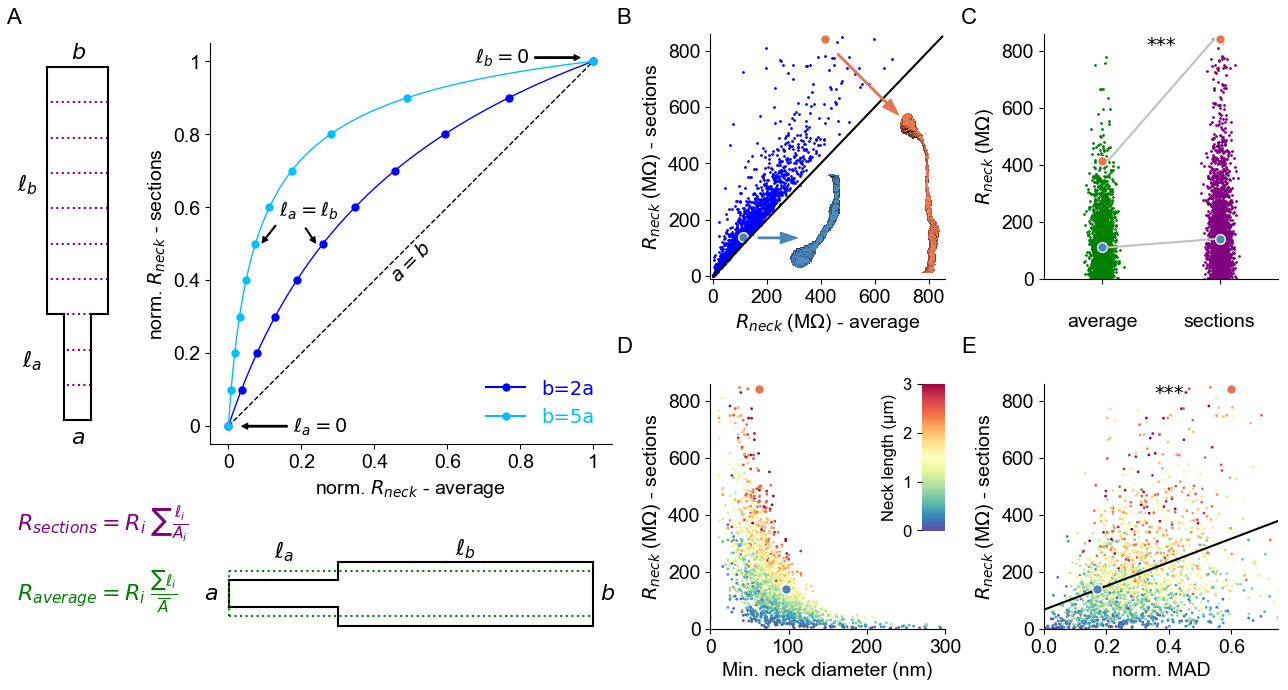

In [21]:
POINTS_COLOR = 'b' 
POINTS_SIZE = 1 

fig = plt.figure(figsize=(13 , 7), constrained_layout=False) # w, h
gs = gridspec.GridSpec(4, 8)
ax1 = fig.add_subplot(gs[0:3, 0]) # slices - row, column
ax2 = fig.add_subplot(gs[3, 1:4])
ax3 = fig.add_subplot(gs[0:2, 4:6])
ax7 = fig.add_subplot(gs[2:4, 4:6])
ax5 = fig.add_subplot(gs[0:3, 1:4]) # main

ax4 = fig.add_subplot(gs[0:2, 6:8])
ax6 = fig.add_subplot(gs[2:4, 6:8])

ax1.set_aspect('equal')
x0, y0 = 0, 0
ax1.plot([y0, y0 + 0.75], [x0, x0], color='black')  # Vertical line 'a'
ax1.text(y0 + 0.4 / 2, x0 - 0.5, '$a$', va='center', fontsize=16) # radius a
x1 = x0 + 1
ax1.plot([y0 + 0.75, y0 + 0.75], [x0, x1], color='black')  # Horizontal line
# Dashed vertical line
ax1.plot([y0 + 0.75, y0], [x1, x1], color='purple', linestyle=':') 
# Next horizontal line with label l1
x2 = x1 + 1
ax1.plot([y0 + 0.75, y0 + 0.75], [x1, x2], color='black')
ax1.text(y0 - 1.00 + 0.1, x1 + 0.5, r'$\ell_{a}$', ha='center', fontsize=16)
ax1.plot([y0 + 0.75, y0], [x2, x2], color='purple', linestyle=':') 
x3 = x2 + 1
ax1.plot([y0 + 0.75, y0 + 0.75], [x2, x3], color='black')
# Dashed vertical line
ax1.plot([y0 + 0.75, y0], [x3, x3], color='purple', linestyle=':')
# Vertical line Vh
ax1.plot([y0 + 0.75, y0 + 1.25], [x3, x3], color='black')
x4 = x3 + 1
ax1.plot([y0 + 1.25, y0 + 1.25], [x3, x4], color='black')
ax1.plot([y0 + 1.25, y0 - 0.5], [x4, x4], color='purple', linestyle=':')
x5 = x4 + 1
ax1.plot([y0 + 1.25, y0 + 1.25], [x4, x5], color='black')
ax1.plot([y0 + 1.25, y0 - 0.5], [x5, x5], color='purple', linestyle=':')
x6 = x5 + 1
ax1.plot([y0 + 1.25, y0 + 1.25], [x5, x6], color='black')
ax1.plot([y0 + 1.25, y0 - 0.5], [x6, x6], color='purple', linestyle=':')
x7 = x6 + 1
ax1.plot([y0 + 1.25, y0 + 1.25], [x6, x7], color='black')
ax1.text(y0 - 1.25 + 0.2, x6 + 0.5, r'$\ell_{b}$', ha='center', fontsize=16)
ax1.plot([y0 + 1.25, y0 - 0.5],[x7, x7],  color='purple', linestyle=':')
x8 = x7 + 1
ax1.plot([y0 + 1.25, y0 + 1.25], [x7, x8], color='black')
ax1.plot([y0 + 1.25, y0 - 0.5], [x8, x8], color='purple', linestyle=':')
x9 = x8 + 1
ax1.plot([y0 + 1.25, y0 + 1.25], [x8, x9], color='k')
ax1.plot([y0 + 1.25, y0 - 0.5], [x9, x9], color='purple', linestyle=':')
x10 = x9 + 1
ax1.plot([y0 + 1.25, y0 + 1.25],[x9, x10],  color='k')
# Vertical line down from x8
ax1.plot([y0 + 1.25, y0 - 0.5], [x10, x10], color='black')
# Line b label
ax1.text(y0 + 0.4 / 2, x10 + 0.4, '$b$', va='center', fontsize=16) # radius b
# Draw horizontal line to the left
ax1.plot([y0 - 0.5, y0 - 0.5], [x10, x0 + 3], color='k')
# Small vertical line up
ax1.plot([y0 - 0.5, y0], [x3, x3], color='black')
# Last horizontal line to the left
ax1.plot([y0, y0], [x0, x3], color='black')
ax1.axis('off')


################################
ax2.axis('off')
ax2.set_aspect('equal')

# Coordinates for lines
x0, y0 = 0, 0  # Starting point

ax2.plot([x0, x0], [y0, y0 + 0.75], color='black')  # Vertical line 'a'
ax2.text(x0 - 0.7, y0 + 0.75 / 2, '$a$', va='center', fontsize=16) # radius a

x1 = x0 + 1
ax2.plot([x0, x1], [y0 + 0.75, y0 + 0.75], color='black')  # Horizontal line
x2 = x1 + 1
ax2.plot([x1, x2], [y0 + 0.75, y0 + 0.75], color='black')
ax2.text(x1 + 0.5, y0 + 1.25 + 0.1, r'$\ell_{a}$', ha='center', fontsize=16)
x3 = x2 + 1
ax2.plot([x2, x3], [y0 + 0.75, y0 + 0.75], color='black')
ax2.plot([x3, x3], [y0 + 0.75, y0 + 1.25], color='black')
x4 = x3 + 1
ax2.plot([x3, x4], [y0 + 1.25, y0 + 1.25], color='black')
x5 = x4 + 1
ax2.plot([x4, x5], [y0 + 1.25, y0 + 1.25], color='black')
x6 = x5 + 1
ax2.plot([x5, x6], [y0 + 1.25, y0 + 1.25], color='black')
x7 = x6 + 1
ax2.plot([x6, x7], [y0 + 1.25, y0 + 1.25], color='black')
ax2.text(x6 + 0.5, y0 + 1.25 + 0.2, r'$\ell_{b}$', ha='center', fontsize=16)
x8 = x7 + 1
ax2.plot([x7, x8], [y0 + 1.25, y0 + 1.25], color='black')
x9 = x8 + 1
ax2.plot([x8, x9], [y0 + 1.25, y0 + 1.25], color='k')
x10 = x9 + 1
ax2.plot([x9, x10], [y0 + 1.25, y0 + 1.25], color='k')
ax2.plot([x10, x10], [y0 + 1.25, y0 - 0.5], color='black')
# Line b label
ax2.text(x10 + 0.2, y0 + 0.75 / 2, '$b$', va='center', fontsize=16) # radius b
ax2.plot([x10, x0 + 3], [y0 - 0.5, y0 - 0.5], color='k')
ax2.plot([x3, x3], [y0 - 0.5, y0], color='black')
ax2.plot([x0, x3], [y0, y0], color='black')
ax2.plot([x0, x10], [y0 + 1, y0 + 1], color='g', linestyle=':')
ax2.plot([x0, x10], [y0 - 0.25, y0 - 0.25], color='g', linestyle=':')
ax2.plot([x0, x0], [y0 - 0.25, y0 + 1], color='g', linestyle=':')



ax3.scatter(1.5*df2['neck_length']/df2['weighted_average_cs_area'], R_necks, s=POINTS_SIZE, color=POINTS_COLOR, alpha=1)
ax3.plot(110.021459, 139.14, '.', color='w', markersize=14) # the blue one
ax3.plot(110.021459, 139.14, '.', color='#4b85b7', markersize=10) # the blue one
ax3.plot(414.568966, 840, '.', color='w', markersize=14) # the orange one
ax3.plot(414.568966, 840, '.', color='#e3754f', markersize=10) # the orange one
ax3.plot([0,850], [0,850] , 'k')
ax3.set_xlim([-10, 860]); ax3.set_ylim([-10, 860])
ticks3 = [0, 200, 400, 600, 800]
ax3.set_xticks(ticks3,ticks3, fontsize=14, family='Arial'); ax3.set_yticks(ticks3,ticks3, fontsize=14, family='Arial')


#####
x_min, x_max = ax3.get_xlim()
y_min, y_max = ax3.get_ylim()
left = 650; bottom=10
x_extent = (x_max - x_min) * 0.27 
y_extent = (y_max - y_min) * 0.27 * 2.5 
ax3.imshow(img_2325[100:3100,:,:], aspect='auto', extent=[left, left + x_extent, bottom, bottom + y_extent], zorder=12, interpolation='none') # [750, 850, 50, 118]

left = 280; bottom=0
x_extent = (x_max - x_min) * 0.22
y_extent = (y_max - y_min) * 0.22*2

ax3.imshow(img_2368[1000:3000,:,:], aspect='auto', extent=[left, left + x_extent, bottom, bottom + y_extent], zorder=11, interpolation='none')#) # [50, 150, 130, 198]

plt.xticks(family='Arial'); plt.yticks(family='Arial')

# Blue arrow:
ax3.annotate('', xy=(320, 135), xytext=(160, 135), arrowprops=dict(facecolor='#4b85b7', edgecolor='#4b85b7', shrink=0.05, width=1, headwidth=8), fontsize=14)#, ha='center', va='center', color='#4b85b7', rotation=270)

# orange arrow:
ax3.annotate('', xy=(700, 560), xytext=(450, 800), arrowprops=dict(facecolor='#e3754f', edgecolor='#e3754f', shrink=0.05, width=1, headwidth=8), fontsize=14)#, ha='center', va='center', color='#4b85b7', rotation=270)


ax3.set_xlabel(r'$R_{neck}$ (M$\Omega$) - average', fontsize=14, family='Arial')
ax3.set_ylabel(r'$R_{neck}$ (M$\Omega$) - sections', fontsize=14, family='Arial')
ax3.spines['right'].set_visible(False); ax3.spines['top'].set_visible(False)
plt.xticks(family='Arial')
plt.yticks(family='Arial')


########

ax4.scatter(x_R_necks_av, R_necks_av, color='g', s=POINTS_SIZE, alpha=1)
ax4.scatter(x_R_necks, R_necks, color='purple', s=POINTS_SIZE, alpha=1) # #C0C0C0

ax4.plot(1 , 110.021459, '.', color='w', markersize=14) # + np.random.normal(0, jitter)
ax4.plot(1 , 110.021459, '.', color='#4b85b7', markersize=10)
ax4.plot(1 , 414.568966, '.', color='w', markersize=14)
ax4.plot(1 , 414.568966, '.', color='#e3754f', markersize=10)
ax4.plot(2, 139.14, '.', color='white', markersize=14)  # Larger white dot
ax4.plot(2 , 139.14, '.', color='#4b85b7', markersize=10)
ax4.plot(2 , 840, '.', color='w', markersize=14)
ax4.plot(2 , 840, '.', color='#e3754f', markersize=10)
ax4.plot([1.05, 1.95], [110.021459, 139.14], '#C0C0C0')
ax4.plot([1.05, 1.95], [414.568966, 840], '#C0C0C0')
ast = '***' if pval[1] < 0.001 else '**' if pval[1] < 0.01 else '*' if pval[1] < 0.05 else ''
ax4.annotate(ast, xy=(1.5, 800), xycoords='data', ha='center', fontsize=14) # asterisks
ax4.set_ylabel(r'$R_{neck}$ (M$\Omega$)', fontsize=14, family='Arial')
ax4.set_xlim([0.5, 2.5]); ax4.set_ylim([0, 860])
ax4.spines['right'].set_visible(False); ax4.spines['top'].set_visible(False)
ax4.set_yticks(ticks3,ticks3)
plt.xticks(family='Arial'); plt.yticks(family='Arial')
ax4.set_xticks([1, 2], ['average', 'sections'], fontsize=14, family='Arial')
ax4.set_yticks(ticks3,ticks3, fontsize=14, family='Arial')
for label in ax4.get_xticklabels():
    label.set_y(-0.1)  # adjust the offset as needed (e.g., -0.2 for lower)

ax5.set_aspect('equal')
ax5.plot([np.min(Rss), np.max(Rss)], [np.min(Rss), np.max(Rss)], '--k', linewidth=1)
ax5.plot(Ravs, Rss, color='blue', marker='.', linestyle='', markersize=10, linewidth=1);
ax5.plot(Ravs_100, Rss_100, color='blue', marker='', linestyle='-', markersize=10, linewidth=1);
ax5.plot(Ravs2, Rss2, color='deepskyblue', marker='.', linestyle='', markersize=10, linewidth=1);
ax5.plot(Ravs2_100, Rss2_100, color='deepskyblue', marker='', linestyle='-', markersize=10, linewidth=1);

# for the legend:
ax5.plot(-1, -1, color='blue', marker='.', markersize=10, label='b=2a'); # 
ax5.plot(-1, -1, color='deepskyblue', marker='.', markersize=10, label='b=5a');

ax5.text(0.5, 0.45, r'$a = b$', fontsize=14, ha='center', va='center', rotation=45)
# DIAGONALS - do not delete:
# ax5.text(0.36, 0.68, r'$b = 2a$', fontsize=14, ha='center', va='center', color='b', rotation=45)
# ax5.text(0.22, 0.84, r'$b = 5a$', fontsize=14, ha='center', va='center', color='deepskyblue', rotation=45)
ax5.annotate(r'$\ell_{a} = 0$', xy=(0.03, 0), xytext=(0.25, 0), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=4, headlength=4), fontsize=14, ha='center', va='center')
ax5.annotate(r'$\ell_{b} = 0$', xy=(.97, 1.01), xytext=(.75, 1.01), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=4, headlength=4), fontsize=14, ha='center', va='center')
ax5.annotate(r'$\ell_{a} = \ell_{b}$', xy=(.09, .5), xytext=(.219, .591), arrowprops=dict(facecolor='black', shrink=0.05, width=.5, headwidth=4, headlength=4), fontsize=14, ha='center', va='center')
ax5.annotate('', xy=(.24, .5), xytext=(.21, .545), arrowprops=dict(facecolor='black', shrink=0.05, width=.5, headwidth=4, headlength=4), fontsize=14, ha='center', va='center')

ax5.set_xlim([-0.05, 1.05]); ax5.set_ylim([-0.05, 1.05])
ticks5 = [0,0.2,0.4, 0.6, 0.8, 1]
ax5.set_xticks(ticks5,ticks5, fontsize=14, family='Arial')
ax5.set_yticks(ticks5,ticks5, fontsize=14, family='Arial')
ax5.set_xlabel(r'norm. $R_{neck}$ - average', fontsize=14, family='Arial') #    $\frac{\sum l_i}{\overline{A}}$
ax5.set_ylabel(r'norm. $R_{neck}$ - sections', fontsize=14, family='Arial') #   $\sum \frac{l_i}{A_i}$
ax5.spines['right'].set_visible(False); ax5.spines['top'].set_visible(False)
legend = ax5.legend(fontsize=14, frameon=False, loc='lower right')
legend.get_texts()[0].set_color('b')
legend.get_texts()[1].set_color('deepskyblue')

plt.xticks(family='Arial'); plt.yticks(family='Arial')
plt.tick_params(axis="x", labelsize=14); plt.tick_params(axis="y", labelsize=14)

ax6.scatter(x_MAD, y_R, s=POINTS_SIZE, c=color_vals2, cmap='Spectral_r') # 'b'

# Linear Regression:
slope, intercept, r_value_LR, p_value_LR, std_err = linregress(x_MAD, y_R)
x_fit = np.array([np.min(x_MAD), np.max(x_MAD)])
y_fit = intercept + slope * x_fit
ax6.plot(x_fit, y_fit, 'k', label='fitted line')
print('r_value_LR:', r_value_LR, 'p_value_LR:', p_value_LR)
ast = '***' if p_value_org_MAD_R < 0.001 else '**' if p_value_org_MAD_R < 0.01 else '*' if p_value_org_MAD_R < 0.05 else ''
ax6.annotate(ast, xy=(0.5-0.03, 0.94), xycoords='axes fraction', fontsize=14)
ax6.set_xlabel('norm. MAD', fontsize=14, family='Arial')
ax6.set_ylabel('$R_{neck}$ (M$\Omega$) - sections', fontsize=14, family='Arial')
ax6.spines['right'].set_visible(False); ax6.spines['top'].set_visible(False)
ax6.plot(bin_x_position_b + np.diff(bins1)[bin_index_b]/2, 139.14, '.', color='white', markersize=14)  # Larger white dot
ax6.plot(bin_x_position_b + np.diff(bins1)[bin_index_b]/2 , 139.14, '.', color='#4b85b7', markersize=10)
ax6.plot(bin_x_position_o + np.diff(bins1)[bin_index_o]/2 , 840, '.', color='w', markersize=14)
ax6.plot(bin_x_position_o + np.diff(bins1)[bin_index_o]/2 , 840, '.', color='#e3754f', markersize=10)
ax6.set_xlim([0, 0.75])
ax6.set_ylim([0, 860])
ax6.tick_params(axis="x", labelsize=14)
ax6.tick_params(axis="y", labelsize=14)
for label in ax6.get_xticklabels():
    label.set_family('Arial')
for label in ax6.get_yticklabels():
    label.set_family('Arial')

#### 7
Neck_radius = np.sqrt(df2['min_cs_area']/np.pi)
color_vals = np.clip(df2['neck_length'], None, 3)
sc = ax7.scatter(Neck_radius*2*1000, df2['Resistance'], c=color_vals, cmap='Spectral_r', vmin=0, vmax=3, s=POINTS_SIZE)
ax7.set_xlabel('Min. neck diameter (nm)', fontsize=14, family='Arial')
ax7.set_ylabel('$R_{neck}$ (M$\Omega$) - sections', fontsize=14, family='Arial')
ax7.spines['right'].set_visible(False); ax7.spines['top'].set_visible(False)
ax7.plot(Neck_radius_sorted[1634], 139.14, '.', color='white', markersize=14)  # Larger white dot
ax7.plot(Neck_radius_sorted[1634] , 139.14, '.', color='#4b85b7', markersize=10)
ax7.plot(Neck_radius_sorted[660] , 840, '.', color='w', markersize=14)
ax7.plot(Neck_radius_sorted[660] , 840, '.', color='#e3754f', markersize=10)
ax7.set_xlim([0,300]) # -2,250
ax7.set_ylim([0,860]) # -10,860
ax7.tick_params(axis="x", labelsize=14)
ax7.tick_params(axis="y", labelsize=14)
for label in ax7.get_xticklabels():
    label.set_family('Arial')
for label in ax7.get_yticklabels():
    label.set_family('Arial')

# Explicit position: [left, bottom, width, height], all in axes fraction (0–1)
cbar_ax = inset_axes(ax7,
                     width="100%", 
                     height="100%",
                     bbox_to_anchor=(0.9, 0.4, 0.10, 0.6),
                     bbox_transform=ax7.transAxes,
                     borderpad=0)

sc.set_clim(-0.01, 3.01)  # Set the color limits
cbar = plt.colorbar(sc, cax=cbar_ax)
cbar.set_ticks([0, 1, 2, 3])
cbar.outline.set_visible(False)


cbar.set_label('Neck length (µm)', fontsize=12, family='Arial')
cbar.ax.tick_params(labelsize=12)
cbar_ax.yaxis.tick_left()  # Move ticks to the right
cbar_ax.yaxis.set_label_position('left')
plt.xticks(family='Arial'); plt.yticks(family='Arial')
plt.tick_params(axis="x", labelsize=12); plt.tick_params(axis="y", labelsize=12)
plt.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.94, bottom=0.09, hspace=1.5)#, wspace=1.6

plt.annotate('A', xy=(0.01,.96), xycoords='figure fraction', ha='center', va='center', fontsize=16, family='Arial');
plt.annotate('B', xy=(0.48,0.96), xycoords='figure fraction', ha='center', va='center', fontsize=16, family='Arial');
plt.annotate('D', xy=(0.48,0.49), xycoords='figure fraction', ha='center', va='center', fontsize=16, family='Arial');

plt.annotate('C', xy=(0.745,0.96), xycoords='figure fraction', ha='center', va='center', fontsize=16, family='Arial');
plt.annotate('E', xy=(0.745,0.49), xycoords='figure fraction', ha='center', va='center', fontsize=16, family='Arial');


fig.text(0.01, 0.23, r'$R_{sections}= R_i \; \sum \frac{\ell_i}{A_i}$', color='purple', ha='left', fontsize=16);
fig.text(0.01, 0.13, r'$R_{average}= R_i \;\frac{\sum \ell_i}{\overline{A}}$', color='g', ha='left', fontsize=16);

# plt.savefig('figures/figure2-Neck-Resistance-v9.jpg', dpi=600)
# plt.savefig('figures/figure2-Neck-Resistance-v9.pdf')
